# Let's Increase Wins and Make the Playoffs

---


Baseball organizations are always looking for the edge to win. Some teams are able to spend more money on talented players, while others need to be creative and piece together a team that potentially can win. Using data to make baseball decisions has come to the forefront over the past 20 years and is known as “moneyball.” Using the [Teams.csv](https://drive.google.com/file/d/1Xxv4wKjFVOcQznbu8LHE8owRu4gDV1BA/view?usp=sharing) dataset from [seanlahman.com](http://www.seanlahman.com/baseball-archive/statistics/), I want to answer two important questions:

> **How can baseball teams win more games?**

> **How can baseball teams make the playoffs?**

This data set has complete MLB team statistic by year. It is a team focused dataset that contains offensive, defensive, and pitching statistics.


Baseball has changed over the year. For my research we are using "modern era" baseball from 1973 to present day and only using full 162 game seasons.

---



Two hypotheses:

1. There is no significant difference in Wins based on OBP (On base %)

  Ho: μ1-μ2=0

  Ha: μ1-μ2≠0

2. There is no significant difference in wins based on ERA (earned run avg.)

  Ho: μ1-μ2=0

  Ha: μ1-μ2≠0



In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import libraries
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/gdrive/My Drive/Thinkful/MLB_Team_Stats.csv')


Checking the data to ensure consitent filled cells. Will be using W, ERA, H, BB, AB, SF, and HBP.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          1230 non-null   int64  
 1   lgID            1230 non-null   object 
 2   teamID          1230 non-null   object 
 3   franchID        1230 non-null   object 
 4   divID           1230 non-null   object 
 5   Rank            1230 non-null   int64  
 6   G               1230 non-null   int64  
 7   Ghome           1230 non-null   int64  
 8   W               1230 non-null   int64  
 9   L               1230 non-null   int64  
 10  DivWin          1230 non-null   object 
 11  WCWin           716 non-null    object 
 12  LgWin           1230 non-null   object 
 13  WSWin           1230 non-null   object 
 14  R               1230 non-null   int64  
 15  AB              1230 non-null   int64  
 16  H               1230 non-null   int64  
 17  2B              1230 non-null   i

# Calculating OBP
On Base Percentage (OBP) is a key stat spoken about and one I want to test. OBP is not part of this data set. I added a column and calculate OBP. 

In [ ]:
OBP_df = df.assign(OBP = (df.H + df.BB + df.HBP)/(df.AB + df.BB + df.HBP + df.SF))
OBP_df.head

<bound method NDFrame.head of       yearID lgID teamID franchID  ... teamIDBR  teamIDlahman45  teamIDretro       OBP
0       1973   NL    CHN      CHC  ...      CHC             CHN          CHN  0.319766
1       1973   NL    NYN      NYM  ...      NYM             NYN          NYN  0.315059
2       1973   NL    ATL      ATL  ...      ATL             ATL          ATL  0.338503
3       1973   AL    BAL      BAL  ...      BAL             BAL          BAL  0.344910
4       1973   AL    BOS      BOS  ...      BOS             BOS          BOS  0.337818
...      ...  ...    ...      ...  ...      ...             ...          ...       ...
1225    2019   NL    SLN      STL  ...      STL             SLN          SLN  0.322122
1226    2019   AL    TBA      TBD  ...      TBR             TBA          TBA  0.325315
1227    2019   AL    TEX      TEX  ...      TEX             TEX          TEX  0.319321
1228    2019   AL    TOR      TOR  ...      TOR             TOR          TOR  0.305021
1229    2019 

# Coorelations

---


Earned Run Average(ERA) and OBP correlation to Wins

In [ ]:
OBP_df[['W', 'ERA', 'OBP']].corr()

,W,ERA,OBP
W,1.000000,-0.554323,0.526951
ERA,-0.554323,1.000000,0.185316
OBP,0.526951,0.185316,1.000000


The above correlation, you can see that there is a positive coorelation between Wins & OBP and a negative coorelation between Wins & ERA. That helps reject both null hypotheses. In baseball, the higher the OBP and the lower the ERA, the better.

# Pearson Test

---


**Wins and ERA**

In [ ]:
stats.pearsonr(OBP_df['W'], OBP_df['ERA'])

(-0.5543230753398346, 5.217028930167146e-100)

with a p-value < .001, you can see that there is a significant relationship. We will go more into detail to compare ERA with high and low win teams.

**Wins and OBP**

In [ ]:
stats.pearsonr(OBP_df['W'], OBP_df['OBP'])

(0.5269510268737766, 7.861998676962277e-89)

with a p-value < .001, you can see that there is a significant relationship. We will go more into detail to compare OBP with high and low win teams.

# High vs Low Win Teams

---
With a 162 game season, I want to test the OBP and ERA of teams with more and less than the median of 81 wins.


Create a new dataframe that only includes teams that **won < 81 games** in a season.

In [ ]:
under_81_wins = OBP_df.iloc[(OBP_df['W'] < 81).values]
under_81_wins.head

<bound method NDFrame.head of       yearID lgID teamID franchID  ... teamIDBR  teamIDlahman45  teamIDretro       OBP
0       1973   NL    CHN      CHC  ...      CHC             CHN          CHN  0.319766
2       1973   NL    ATL      ATL  ...      ATL             ATL          ATL  0.338503
5       1973   AL    CAL      ANA  ...      CAL             CAL          CAL  0.318070
6       1973   AL    CHA      CHW  ...      CHW             CHA          CHA  0.323529
8       1973   AL    CLE      CLE  ...      CLE             CLE          CLE  0.314761
...      ...  ...    ...      ...  ...      ...             ...          ...       ...
1222    2019   NL    SDN      SDP  ...      SDP             SDN          SDN  0.307641
1223    2019   AL    SEA      SEA  ...      SEA             SEA          SEA  0.315543
1224    2019   NL    SFN      SFG  ...      SFG             SFN          SFN  0.302148
1227    2019   AL    TEX      TEX  ...      TEX             TEX          TEX  0.319321
1228    2019 

*Find and visualize the mean and range of the data*

In [ ]:
under_81_wins[['W', 'ERA', 'OBP']].describe()

,W,ERA,OBP
count,592.000000,592.000000,592.000000
mean,71.177365,4.382061,0.321177
std,6.633808,0.522532,0.012347
min,43.000000,2.950000,0.291364
25%,67.000000,4.007500,0.312765
50%,72.000000,4.365000,0.320652
75%,76.000000,4.742500,0.328946
max,80.000000,6.380000,0.360576


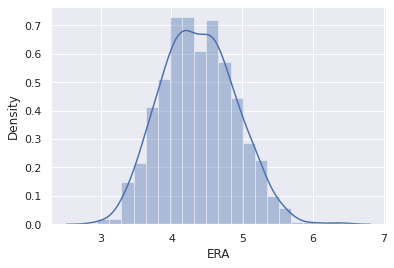

In [ ]:
ax = sns.distplot(under_81_wins['ERA'])

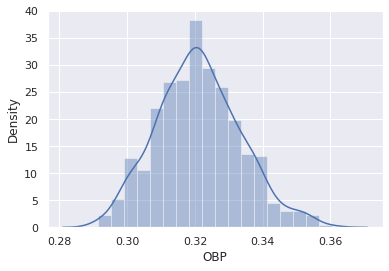

In [ ]:
ax = sns.distplot(under_81_wins['OBP'])

Create a new dataframe that only includes teams that **won > 81 games** in a season.

In [ ]:
over_81_wins = OBP_df.iloc[(OBP_df['W'] > 81).values]
over_81_wins.head

<bound method NDFrame.head of       yearID lgID teamID franchID  ... teamIDBR  teamIDlahman45  teamIDretro       OBP
1       1973   NL    NYN      NYM  ...      NYM             NYN          NYN  0.315059
3       1973   AL    BAL      BAL  ...      BAL             BAL          BAL  0.344910
4       1973   AL    BOS      BOS  ...      BOS             BOS          BOS  0.337818
7       1973   NL    CIN      CIN  ...      CIN             CIN          CIN  0.332155
9       1973   AL    DET      DET  ...      DET             DET          DET  0.320026
...      ...  ...    ...      ...  ...      ...             ...          ...       ...
1218    2019   NL    NYN      NYM  ...      NYM             NYN          NYN  0.328330
1219    2019   AL    OAK      OAK  ...      OAK             OAK          OAK  0.327212
1225    2019   NL    SLN      STL  ...      STL             SLN          SLN  0.322122
1226    2019   AL    TBA      TBD  ...      TBR             TBA          TBA  0.325315
1229    2019 

*Find and visualize the mean and range of the data*

In [ ]:
over_81_wins[['W', 'ERA', 'OBP']].describe()

,W,ERA,OBP
count,602.000000,602.000000,602.000000
mean,90.504983,3.850365,0.333447
std,5.997571,0.452546,0.012960
min,82.000000,2.910000,0.300337
25%,86.000000,3.540000,0.324173
50%,90.000000,3.810000,0.332693
75%,95.000000,4.140000,0.341419
max,116.000000,5.590000,0.373442


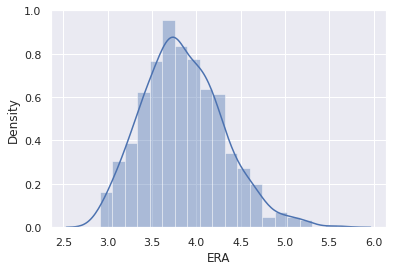

In [ ]:
ax = sns.distplot(over_81_wins['ERA'])

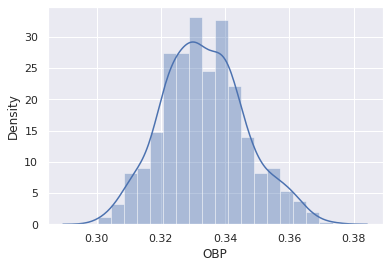

In [ ]:
ax = sns.distplot(over_81_wins['OBP'])

# T-Tests

---
We already know that there is a relationship between ERA & Wins and OBP & Wins. Here we test the relationships between those teams with < 81  wins and those with > 81 wins.

**ERA**

In [ ]:
stats.ttest_ind(under_81_wins['ERA'], over_81_wins['ERA'])

Ttest_indResult(statistic=18.804210969205506, pvalue=2.7658837816782715e-69)

With a **p-value of < .001**, we can reject the null hypothesis. There is a significant difference in ERA when comparing teams with more and less wins.

> *plot of ERA for under 81 wins*

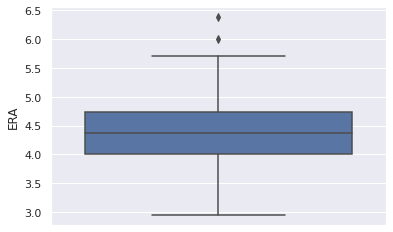

In [ ]:
sns.boxplot(y="ERA", data=under_81_wins)

> *plot of ERA for over 81 wins*

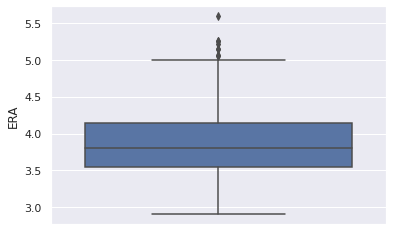

In [ ]:
sns.boxplot(y="ERA", data=over_81_wins)

You can see the difference with teams with more than 81 wins have an Inter Qualrtile Range mostly below 4 and teams that have less than 81 wins have an Inter Quartile Range above 4.

**OBP**

In [ ]:
stats.ttest_ind(under_81_wins['OBP'], over_81_wins['OBP'])

Ttest_indResult(statistic=-16.745743229164287, pvalue=1.0865623944312172e-56)

With a **p-value of < .001**, we can reject the null hypothesis. There is a significant difference in OBP when comparing teams with more and less wins.

> *plot of OBP for under 81 wins*

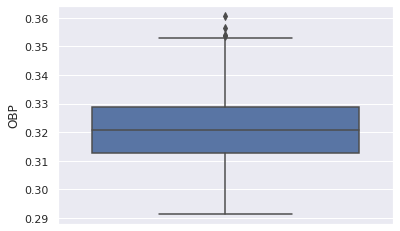

In [ ]:
sns.boxplot(y="OBP", data=under_81_wins)

> *plot of OBP for over 81 wins*

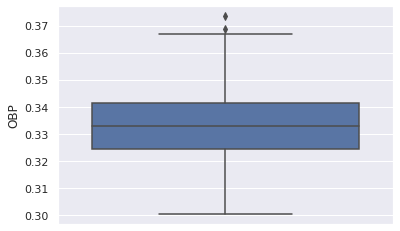

In [ ]:
sns.boxplot(y="OBP", data=over_81_wins)

You can see the difference with teams with more than 81 wins have an Inter Qualrtile Range form .325 to .34 and teams that have less than 81 wins have an Inter Quartile Range from .315 to .33.

**T-Test Findings**

Based on the two t-tests, both ERA and OBP have an impact on Wins. To increase your teams chances to win the most games over an entire season, increase the team's OBP and decrease the team's ERA.

# Playoff Team Benchmarks

---
Increasing Wins is always a goal, but the ultimate goal is to make the playoffs. Let's find out what your target number of Wins should be in order to compete for a coveted playoff spot.


Each season, the top ranked teams from each division have an automatic spot in the playoffs. This data set lists the ranks of each team in the "Rank" field. I created a new dataframe that only incudes the top ranked teams each season in order to create our targets. 

In [ ]:
Top_teams = OBP_df.iloc[(OBP_df['Rank'] == 1).values]
Top_teams.tail()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,OBP
1210,2019,AL,HOU,HOU,W,1,162,81,107,55,Y,N,Y,N,920,5613,1538,323,28,288,645,1166,67,27,66,57,640,595,3.66,2,14,47,4387,1205,230,448,1671,71,96,0.988,Houston Astros,Minute Maid Park,2857367,103,100,HOU,HOU,HOU,0.352453
1213,2019,NL,LAN,LAD,W,1,162,81,106,56,Y,N,N,N,886,5493,1414,302,20,279,607,1356,57,10,81,45,613,541,3.37,3,18,44,4337,1201,185,392,1519,106,117,0.982,Los Angeles Dodgers,Dodger Stadium,3974309,96,94,LAD,LAN,LAN,0.337616
1216,2019,AL,MIN,MIN,C,1,162,81,101,61,Y,N,N,N,939,5732,1547,318,23,307,525,1334,28,21,81,41,754,680,4.18,1,10,50,4390,1456,198,452,1463,111,130,0.981,Minnesota Twins,Target Field,2294152,100,99,MIN,MIN,MIN,0.337514
1217,2019,AL,NYA,NYY,E,1,162,81,103,59,Y,N,N,N,943,5583,1493,290,17,306,569,1437,55,22,49,33,739,691,4.31,1,9,50,4329,1374,248,507,1534,102,135,0.982,New York Yankees,Yankee Stadium III,3304404,98,96,NYY,NYA,NYA,0.338627
1225,2019,NL,SLN,STL,C,1,162,81,91,71,Y,N,N,N,764,5449,1336,246,24,210,561,1420,116,29,76,39,662,609,3.80,1,14,52,4332,1284,191,545,1399,66,168,0.989,St. Louis Cardinals,Busch Stadium III,3480393,98,97,STL,SLN,SLN,0.322122


*Here is the mean for Wins, ERA, and OBP of top ranked teams*



In [ ]:
Top_teams[['W', 'ERA', 'OBP']].describe()

,W,ERA,OBP
count,224.000000,224.000000,224.000000
mean,95.254464,3.743527,0.336686
std,5.483156,0.452367,0.012562
min,82.000000,2.910000,0.305042
25%,91.000000,3.410000,0.327672
50%,95.000000,3.720000,0.336137
75%,98.000000,4.010000,0.344573
max,116.000000,5.070000,0.373442


# Findings and Recomendations

---
We have proven that raising your team's OBP and lowering ERA are factors to winning more games. In addition, we found our targets to accompplish our ultimate goal of making the playoffs.

**Targets:**
> Wins = 95

> OBP = .337

> ERA = 3.74

When reevaluating and adjusting your roster throughout the year, aim to add and remove players inorder to hit the target OBP and ERA. This will ensure you have the best chance to reach the 95 win target and compete for a playoff spot each year.


**Visualizing the findings:**

You can see over the years, as OBP rises, Wins increase

And the opposite is true for ERA. As it lowers, Wins increase.

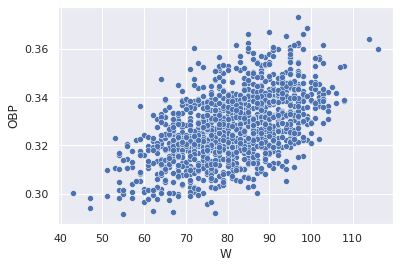

In [ ]:
sns.scatterplot(x="W", y="OBP", data=OBP_df)

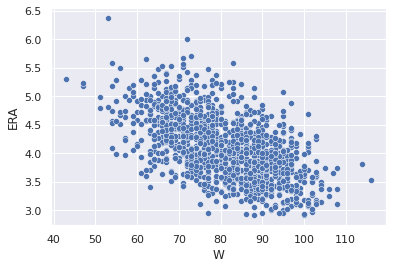

In [ ]:
sns.scatterplot(x="W", y="ERA", data=OBP_df)

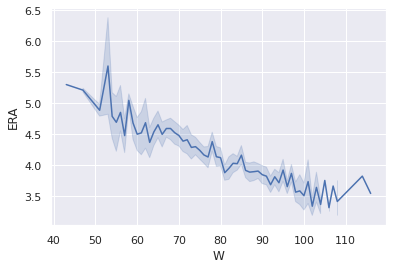

In [ ]:
sns.lineplot(data=OBP_df, x="W", y="ERA")

In [ ]:
sample_1_n = under_81_wins.shape[0]
sample_2_n = over_81_wins.shape[0]
sample_1_mean = under_81_wins['ERA'].mean()
sample_2_mean = over_81_wins['ERA'].mean()
sample_1_var = under_81_wins['ERA'].var()
sample_2_var = over_81_wins['ERA'].var()

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -0.5871814010852452 and -0.4762093235264207.
